# Problems with Hypothesis Testing
Statistical hypothesis testing and the calculation of p-values is a popular way to present and
interpret results. Tests like the Student’s t-test can be used to describe whether or not two
samples have the same distribution. They can help interpret whether the difference between
two sample means is likely real or due to random chance. Although they are widely used, they
have some problems. For example:
* Calculated p-values are easily misused and misunderstood.
* There’s always some significant difference between samples, even if the difference is tiny.

# Estimation Statistics
Estimation statistics refers to methods that attempt to quantify a finding. This might include
quantifying the size of an effect or the amount of uncertainty for a specific outcome or result.
Estimation statistics is a term to describe three main classes of methods. The three main
classes of methods include:
* Effect Size. Methods for quantifying the size of an effect given a treatment or intervention.
* Interval Estimation. Methods for quantifying the amount of uncertainty in a value.
* Meta-Analysis. Methods for quantifying the findings across multiple similar studies.


Although they are not new, they are being called the new statistics given their increased use in
research literature over statistical hypothesis testing.

Where statistical hypothesis tests talk about whether the samples come from the same
distribution or not, estimation statistics can describe the size and confidence of the difference.
This allows you to comment on how different one method is from another.

# Effect Size
There are two main classes of techniques used to quantify the magnitude of effects; they are:
* Association. The degree to which two samples change together.
* Difference. The degree to which two samples are different.

For example, association effect sizes include calculations of correlation, such as the Pearson’s
correlation coefficient, and the r^2
coefficient of determination. They may quantify the linear or
monotonic way that observations in two samples change together. Difference effect size may
include methods such as Cohen’s d statistic that provide a standardized measure for how the
means of two populations differ. They seek a quantification for the magnitude of difference
between observations in two samples

# Interval Estimation
Interval estimation refers to statistical methods for quantifying the uncertainty for an observation.
Intervals transform a point estimate into a range that provides more information about the
estimate, such as its precision, making them easier to compare and interpret.
The point estimates are the dots, and the intervals indicate the uncertainty of those
point estimates.
There are three main types of intervals that are commonly calculated. They are:
* Tolerance Interval: The bounds or coverage of a proportion of a distribution with a
specific level of confidence.
* Confidence Interval: The bounds on the estimate of a population parameter.
* Prediction Interval: The bounds on a single observation

A tolerance interval may be used to set expectations on observations in a population or help
to identify outliers. A confidence interval can be used to interpret the range for a mean of a
data sample that can become more precise as the sample size is increased. A prediction interval
can be used to provide a range for a prediction or forecast from a model. For example, when
presenting the mean estimated skill of a model, a confidence interval can be used to provide
bounds on the precision of the estimate. This could also be combined with p-values if models
are being compared.

# Meta-Analysis
A meta-analysis refers to the use of a weighting of multiple similar studies in order to quantify
a broader cross-study effect. Meta studies are useful when many small and similar studies have
been performed with noisy and conflicting findings. Instead of taking the study conclusions at
face value, statistical methods are used to combine multiple findings into a stronger finding
than any single study.
Although not often used in applied machine learning, it is useful to note meta-analyses as
they form part of this trust of new statistical methods.

# Tolerance Intervals
It can be useful to have an upper and lower limit on data. These bounds can be used to help
identify anomalies and set expectations for what to expect. A bound on observations from
a population is called a tolerance interval. A tolerance interval is different from a prediction
interval that quantifies the uncertainty for a single predicted value. It is also different from a
confidence interval that quantifies the uncertainty of a population parameter such as a mean.

The interval is limited by the sampling error and by the variance of the population distribution.
Given the law of large numbers, as the sample size is increased, the probabilities will better
match the underlying population distribution. Below is an example of a stated tolerance interval:
The range from x to y covers 95% of the data with a confidence of 99%.
If the data is Gaussian, the interval can be expressed in the context of the mean value; for
example:
x +/- y covers 95% of the data with a confidence of 99%.
We refer to these intervals as statistical tolerance intervals, to differentiate them from
tolerance intervals in engineering that describe limits of acceptability, such as for a design or of
a material. Generally, we will describe them as simply tolerance intervals for convenience. A
tolerance interval is defined in terms of two quantities:
* Coverage: The proportion of the population covered by the interval.
* Confidence: The probabilistic confidence that the interval covers the proportion of the
population.


#  Calculate Tolerance Intervals
The size of a tolerance interval is proportional to the size of the data sample from the population
and the variance of the population. There are two main methods for calculating tolerance
intervals depending on the distribution of data: parametric and nonparametric methods.
* Parametric Tolerance Interval: Use knowledge of the population distribution in
specifying both the coverage and confidence. Often used to refer to a Gaussian distribution.
* Nonparametric Tolerance Interval: Use rank statistics to estimate the coverage and
confidence, often resulting less precision (wider intervals) given the lack of information
about the distribution

we must specify the number of degrees of freedom. This will be used in the calculation
of critical values and in the calculation of the interval. Specifically, it is used in the calculation
of the standard deviation. Remember that the degrees of freedom are the number of values in
the calculation that can vary. Here, we have 100 observations, therefore 100 degrees of freedom.
We do not know the standard deviation, therefore it must be estimated using the mean. This
means our degrees of freedom will be (N - 1) or 99.

Next, we must specify the proportional coverage of the data. In this example, we are
interested in the middle 95% of the data. The proportion is 95. We must shift this proportion
so that it covers the middle 95%, that is from 2.5th percentile to the 97.5th percentile. We
know that the critical value for 95% is 1.96 given that we use it so often; nevertheless, we can
calculate it directly in Python using the percentage point function

Next, we need to calculate the confidence of the coverage. We can do this by retrieving the
critical value from the Chi-Squared distribution for the given number of degrees of freedom and
desired probability. We can use the chi2.ppf() SciPy function

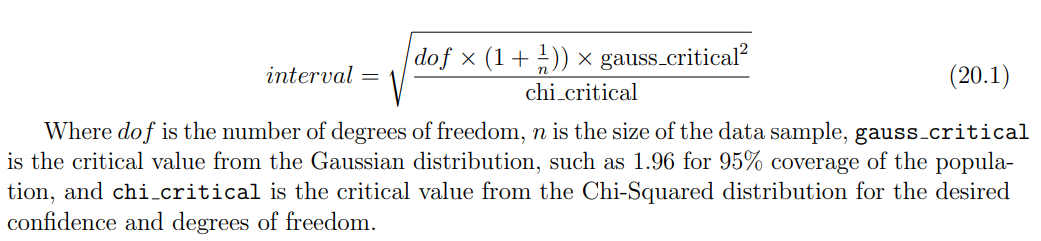

In [1]:
# parametric tolerance interval
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import sqrt
from scipy.stats import chi2
from scipy.stats import norm
# seed the random number generator
seed(1)
# generate dataset
data = 5 * randn(100) + 50
# specify degrees of freedom
n = len(data)
dof = n - 1
# specify data coverage
prop = 0.95
prop_inv = (1.0 - prop) / 2.0
gauss_critical = norm.ppf(prop_inv)
print('Gaussian critical value: %.3f (coverage=%d%%)' % (gauss_critical, prop*100))
# specify confidence
prob = 0.99
prop_inv = 1.0 - prob
chi_critical = chi2.ppf(prop_inv, dof)
print('Chi-Squared critical value: %.3f (prob=%d%%, dof=%d)' % (chi_critical, prob*100, dof))
# tolerance
interval = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)
print('Tolerance Interval: %.3f' % interval)
# summarize
data_mean = mean(data)
lower, upper = data_mean-interval, data_mean+interval
print('%.2f to %.2f covers %d%% of data with a confidence of %d%%' % (lower, upper, prop*100, prob*100))

Gaussian critical value: -1.960 (coverage=95%)
Chi-Squared critical value: 69.230 (prob=99%, dof=99)
Tolerance Interval: 2.355
47.95 to 52.66 covers 95% of data with a confidence of 99%


It can also be helpful to demonstrate how the tolerance interval will decrease (become
more precise) as the size of the sample is increased. The example below demonstrates this by
calculating the tolerance interval for different sample sizes for the same small contrived problem

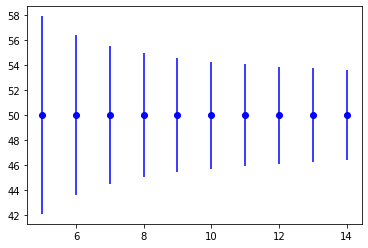

In [3]:
# plot tolerance interval vs sample size
from numpy.random import seed
from numpy.random import randn
from numpy import sqrt
from scipy.stats import chi2
from scipy.stats import norm
from matplotlib import pyplot
# seed the random number generator
seed(1)
# sample sizes
sizes = range(5,15)
for n in sizes:
    # generate dataset
    data = 5 * randn(n) + 50
    # calculate degrees of freedom
    dof = n - 1
    # specify data coverage
    prop = 0.95
    prop_inv = (1.0 - prop) / 2.0
    gauss_critical = norm.ppf(prop_inv)
    # specify confidence
    prob = 0.99
    prop_inv = 1.0 - prob
    chi_critical = chi2.ppf(prop_inv, dof)
    # tolerance
    tol = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)
    # plot
    pyplot.errorbar(n, 50, yerr=tol, color='blue', fmt='o')
# plot results
pyplot.show()

Running the example creates a plot showing the tolerance interval around the true population
mean. We can see that the interval becomes smaller (more precise) as the sample size is increased
from 5 to 15 examples.

# Confidence interval

A confidence interval is different from a tolerance interval that describes the bounds of data
sampled from the distribution. It is also different from a prediction interval that describes the
bounds on a single observation. Instead, the confidence interval provides bounds on a population
parameter, such as a mean, standard deviation, or similar. In applied machine learning, we may
wish to use confidence intervals in the presentation of the skill of a predictive model.<br>
For example, a confidence interval could be used in presenting the skill of a classification
model, which could be stated as:<br>
Given the sample, there is a 95% likelihood that the range x to y covers the true
model accuracy.
<br>
or
<br>
The accuracy of the model was x +/- y at the 95% confidence level.<br>
Confidence intervals can also be used in the presentation of the error of a regression predictive
model; for example:
<br>
There is a 95% likelihood that the range x to y covers the true error of the model.<br>
or<br>
The error of the model was x +/- y at the 95% confidence level.
The choice of 95% confidence is very common in presenting confidence intervals, although
other less common values are used, such as 90% and 99.7%. In practice, you can use any value
you prefer.

The value of a confidence interval is its ability to quantify the uncertainty of the estimate. It
provides both a lower and upper bound and a likelihood. Taken as a radius measure alone, the
confidence interval is often referred to as the margin of error and may be used to graphically
depict the uncertainty of an estimate on graphs through the use of error bars. Often, the larger
the sample from which the estimate was drawn, the more precise the estimate and the smaller
(better) the confidence interval.
* Smaller Confidence Interval: A more precise estimate.
* Larger Confidence Interval: A less precise estimate

Confidence intervals belong to a field of statistics called estimation statistics that can be used
to present and interpret experimental results instead of, or in addition to, statistical significance
tests.

Confidence intervals may be preferred in practice over the use of statistical significance tests.
The reason is that they are easier for practitioners and stakeholders to relate directly to the
domain. They can also be interpreted and used to compare machine learning models

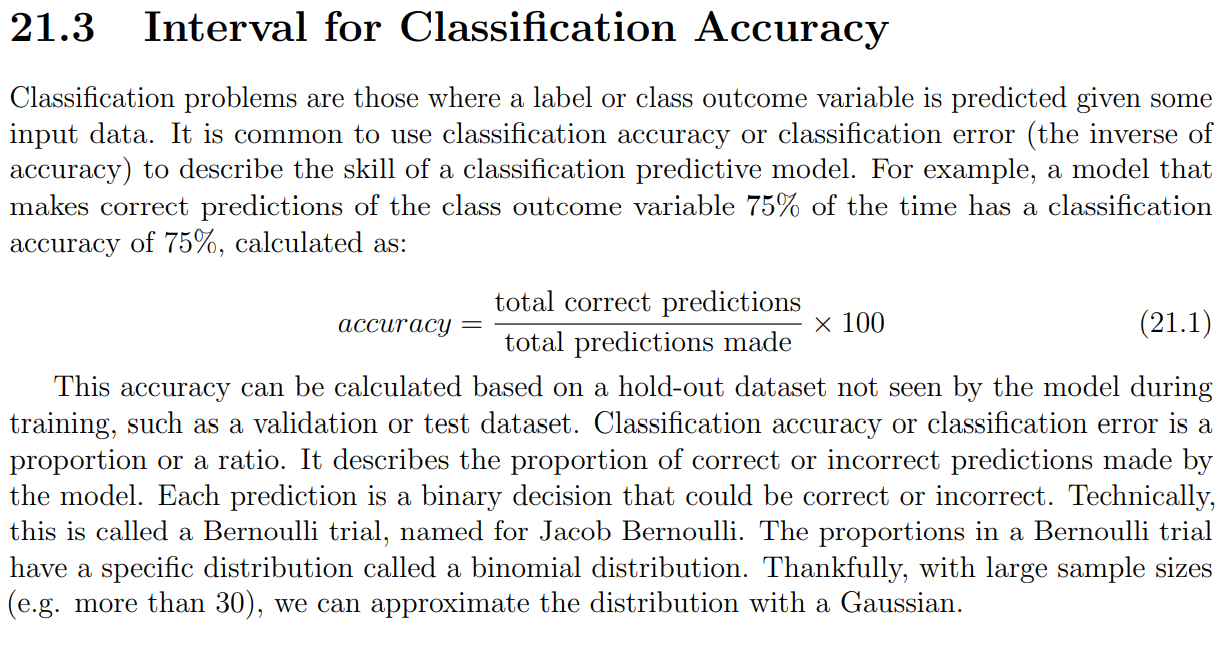

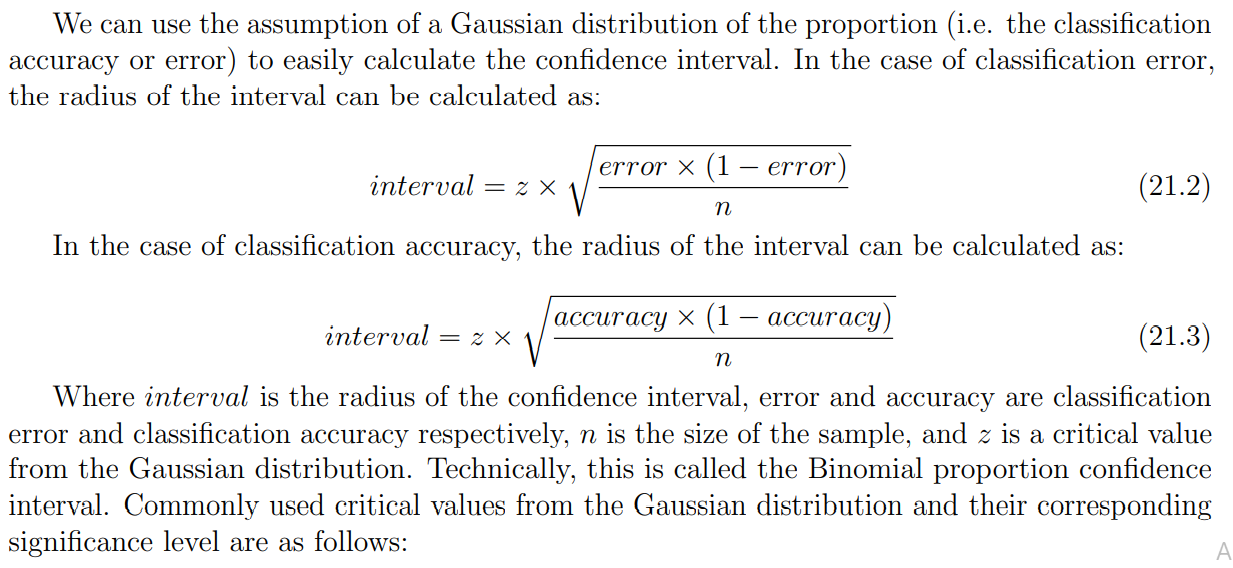

* 1.64 (90%)
* 1.96 (95%)
* 2.33 (98%)
* 2.58 (99%)


Consider a model with an error of 20%, or 0.2 (error = 0.2), on a validation dataset with 50
examples (n = 50). We can calculate the 95% confidence interval (z = 1.96) as follows:

In [1]:
# binomial confidence interval
from math import sqrt
# calculate the interval
interval = 1.96 * sqrt( (0.2 * (1 - 0.2)) / 50)
print('%.3f' % interval)

0.111


We can then make claims such as:
* The classification error of the model is 20% +/- 11%
* The true classification error of the model is likely between 9% and 31%.


We can see the impact that the sample size has on the precision of the estimate in terms of
the radius of the confidence interval.

In [2]:
# binomial confidence interval
from math import sqrt
interval = 1.96 * sqrt( (0.2 * (1 - 0.2)) / 100)
print('%.3f' % interval)

0.078


The proportion confint() Statsmodels function an implementation of the binomial proportion confidence interval. By default, it makes the Gaussian assumption for the Binomial
distribution, although other more sophisticated variations on the calculation are supported. The
function takes the count of successes (or failures), the total number of trials, and the significance
level as arguments and returns the lower and upper bound of the confidence interval. The
example below demonstrates this function in a hypothetical case where a model made 88 correct
predictions out of a dataset with 100 instances and we are interested in the 95% confidence
interval (provided to the function as a significance of 0.05).


In [3]:
# calculate the confidence interval
from statsmodels.stats.proportion import proportion_confint
# calculate the interval
lower, upper = proportion_confint(88, 100, 0.05)
print('lower=%.3f, upper=%.3f' % (lower, upper))

lower=0.816, upper=0.944


Running the example prints the lower and upper bounds on the model’s classification
accuracy.

# Nonparametric Confidence Interval
Often we do not know the distribution for a chosen performance measure. Alternately, we may
not know the analytical way to calculate a confidence interval for a skill score.
<br>
In these cases, the bootstrap resampling method can be used as a nonparametric method for
calculating confidence intervals, nominally called bootstrap confidence intervals. The bootstrap
is a simulated Monte Carlo method where samples are drawn from a fixed finite dataset with
replacement and a parameter is estimated on each sample. This procedure leads to a robust
estimate of the true population parameter via sampling.

The procedure can be used to estimate the skill of a predictive model by fitting the model on
each sample and evaluating the skill of the model on those samples not included in the sample.
The mean or median skill of the model can then be presented as an estimate of the model skill
when evaluated on unseen data. Confidence intervals can be added to this estimate by selecting
observations from the sample of skill scores at specific percentiles.<br>
Recall that a percentile is an observation value drawn from the sorted sample where a
percentage of the observations in the sample fall. For example, the 70th percentile of a sample
indicates that 70% of the samples fall below that value. The 50th percentile is the median
or middle of the distribution. First, we must choose a significance level for the confidence
level, such as 95%, represented as 5.0% (e.g. 100 - 95). Because the confidence interval is
symmetric around the median, we must choose observations at the 2.5th percentile and the
97.5th percentiles to give the full range.


In [2]:
# bootstrap confidence intervals
from numpy.random import seed
from numpy.random import rand
from numpy.random import randint
from numpy import mean
from numpy import median
from numpy import percentile
# seed the random number generator
seed(1)
# generate dataset
dataset = 0.5 + rand(1000) * 0.5# we have a dataset of 1,000 observations of values between 0.5 and 1.0 drawn from a uniform distribution.
# bootstrap
scores = list()
for _ in range(100):
    # bootstrap sample
    indices = randint(0, 1000, 1000)#(low,high,size of output)
    sample = dataset[indices]
    # calculate and store statistic
    statistic = mean(sample)
    scores.append(statistic)
print('50th percentile (median) = %.3f' % median(scores))
# calculate 95% confidence intervals (100 - alpha)
alpha = 5.0
# calculate lower percentile (e.g. 2.5)
lower_p = alpha / 2.0
# retrieve observation at lower percentile
lower = max(0.0, percentile(scores, lower_p))
print('%.1fth percentile = %.3f' % (lower_p, lower))
# calculate upper percentile (e.g. 97.5)
upper_p = (100 - alpha) + (alpha / 2.0)
# retrieve observation at upper percentile
upper = min(1.0, percentile(scores, upper_p))
print('%.1fth percentile = %.3f' % (upper_p, upper))

50th percentile (median) = 0.750
2.5th percentile = 0.741
97.5th percentile = 0.757


In [4]:
print(randint(0, 1000, 10))

[790 380 541 426   5 375 587 391 425 725]


There is a 95% likelihood that the range 0.741 to 0.757 covers the true statistic
median

# What Is a Prediction Interval?
A prediction interval is a quantification of the uncertainty on a prediction. It provides a
probabilistic upper and lower bounds on the estimate of an outcome variable.

Prediction intervals are most commonly used when making predictions or forecasts with a
regression model, where a quantity is being predicted. An example of the presentation of a
prediction interval is as follows:<br>
Given a prediction of ‘y’ given ‘x’, there is a 95% likelihood that the range ‘a’ to ‘b’
covers the true outcome.


A prediction interval is different from a confidence interval. A confidence interval quantifies
the uncertainty on an estimated population variable, such as the mean or standard deviation.
Whereas a prediction interval quantifies the uncertainty on a single observation estimated from
the population

# How to Calculate a Prediction Interval
A prediction interval is calculated as some combination of the estimated variance of the model
and the variance of the outcome variable. Prediction intervals are easy to describe, but difficult
to calculate in practice. In simple cases like linear regression, we can estimate the prediction
interval directly.<br>
In the cases of nonlinear regression algorithms, such as artificial neural networks, it is a lot
more challenging and requires the choice and implementation of specialized techniques. General
techniques such as the bootstrap resampling method can be used, but are computationally
expensive to calculate. The paper A Comprehensive Review of Neural Network-based Prediction
Intervals and New Advances provides a reasonably recent study of prediction intervals for
nonlinear models in the context of neural networks. The following list summarizes some methods
that can be used for prediction uncertainty for nonlinear machine learning models:
* The Delta Method, from the field of nonlinear regression.
* The Bayesian Method, from Bayesian modeling and statistics.
* The Mean-Variance Estimation Method, using estimated statistics.
* The Bootstrap Method, using data resampling and developing an ensemble of models.

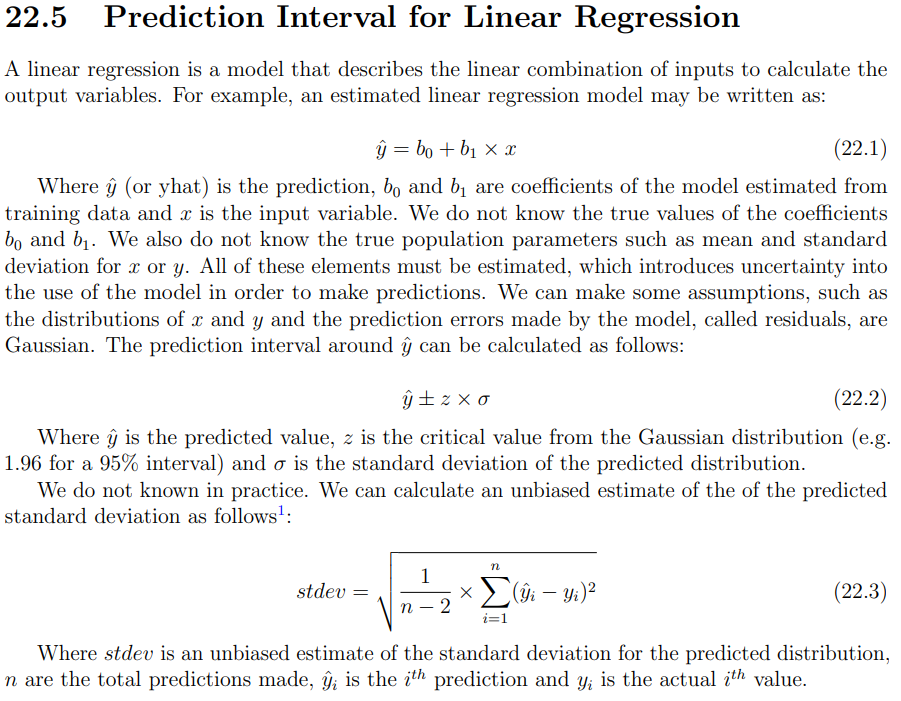

Let’s make the case of linear regression prediction intervals concrete with a worked example.
First, let’s define a simple two-variable dataset where the output variable (y) depends on the
input variable (x) with some Gaussian noise. The example below defines the dataset we will use
for this example.

x: mean=100.776 stdv=19.620
y: mean=151.050 stdv=22.358


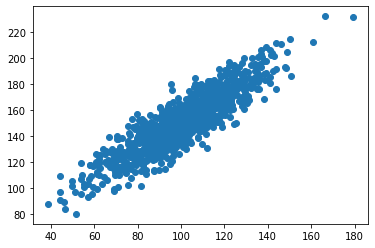

In [2]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50)
# summarize
print('x: mean=%.3f stdv=%.3f' % (mean(x), std(x)))
print('y: mean=%.3f stdv=%.3f' % (mean(y), std(y)))
# plot
pyplot.scatter(x, y)
pyplot.show()

b0=1.011, b1=49.117


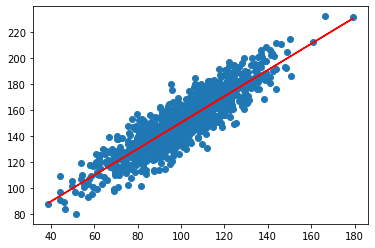

In [4]:
# simple linear regression model
from numpy.random import randn
from numpy.random import seed
from scipy.stats import linregress
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50)
# fit linear regression model
b1, b0, r_value, p_value, std_err = linregress(x, y)
print('b0=%.3f, b1=%.3f' % (b1, b0))
# make prediction
yhat = b0 + b1 * x
# plot data and predictions
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color='r')
pyplot.show()

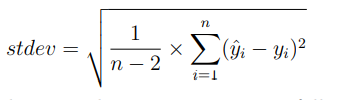

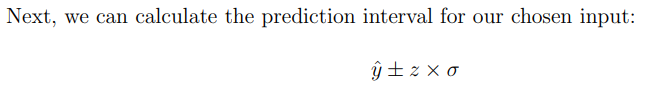

Prediction Interval: 20.204
95% likelihood that the true value is between 124.312 and 164.721
True value: 139.580


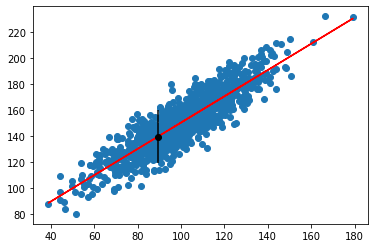

In [6]:
# linear regression prediction with prediction interval
from numpy.random import randn
from numpy.random import seed
from numpy import sqrt
from numpy import sum as arraysum
from scipy.stats import linregress
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50)
# fit linear regression model
b1, b0, r_value, p_value, std_err = linregress(x, y)
# make predictions
yhat = b0 + b1 * x
# define new input, expected value and prediction
x_in = x[2]
y_out = y[2]
yhat_out = yhat[2]
# estimate stdev of yhat
sum_errs = arraysum((y - yhat)**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)
# calculate prediction interval
interval = 1.96 * stdev# 1.96 = 95%
print('Prediction Interval: %.3f' % interval)
lower, upper = y_out - interval, y_out + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
print('True value: %.3f' % yhat_out)
# plot dataset and prediction with interval
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color='red')
pyplot.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
pyplot.show()